In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: clean look for plots
sns.set_style("whitegrid")


In [2]:
df = pd.read_csv("sales_data.csv") 
df.head()

,Date,Region,Product,Quantity Sold,Unit Price,Total Revenue
0,2023-01-01,North,Product A,10,200,2000
1,2023-01-02,South,Product B,15,150,2250
2,2023-01-03,East,Product C,8,180,1440
3,2023-01-04,West,Product D,20,220,4400
4,2023-01-05,North,Product A,10,200,2000


In [3]:
df.info()  # Check for nulls and data types
df.dropna(inplace=True)
df['Date'] = pd.to_datetime(df['Date'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           100 non-null    object
 1   Region         100 non-null    object
 2   Product        100 non-null    object
 3   Quantity Sold  100 non-null    int64 
 4   Unit Price     100 non-null    int64 
 5   Total Revenue  100 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 4.8+ KB


In [4]:
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Profit'] = df['Total Revenue'] - (df['Quantity Sold'] * 100)  # Assuming cost/unit = ₹100


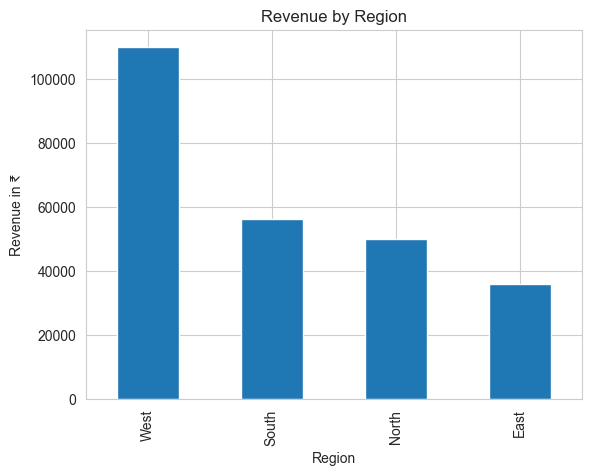

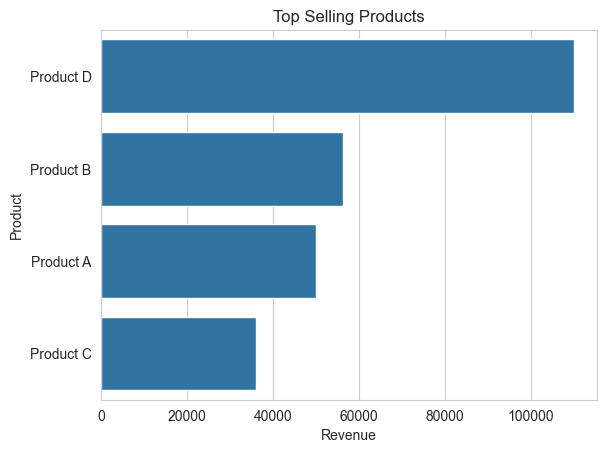

In [5]:
# Total sales by region
region_sales = df.groupby('Region')['Total Revenue'].sum().sort_values(ascending=False)
region_sales.plot(kind='bar', title='Revenue by Region', ylabel='Revenue in ₹')
plt.show()

# Top products
product_perf = df.groupby('Product')['Total Revenue'].sum().sort_values(ascending=False)
sns.barplot(x=product_perf.values, y=product_perf.index)
plt.title("Top Selling Products")
plt.xlabel("Revenue")
plt.ylabel("Product")
plt.show()


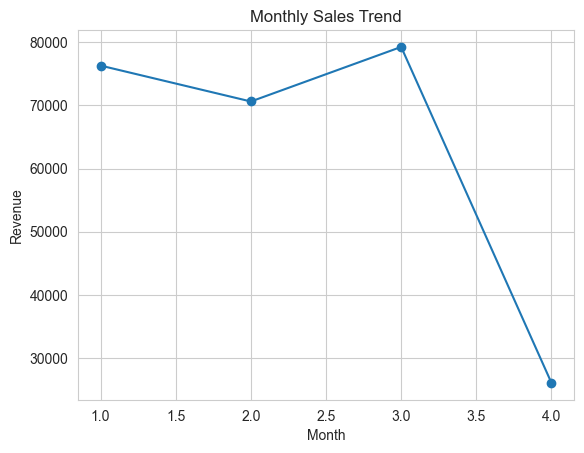

In [6]:
monthly_trend = df.groupby('Month')['Total Revenue'].sum()
monthly_trend.plot(kind='line', marker='o', title='Monthly Sales Trend')
plt.ylabel("Revenue")
plt.show()


In [7]:
df.describe()


,Date,Quantity Sold,Unit Price,Total Revenue,Month,Year,Profit
count,100,100.000000,100.00000,100.000000,100.000000,100.0,100.000000
mean,2023-02-19 12:00:00,13.250000,187.50000,2522.500000,2.200000,2023.0,1197.500000
min,2023-01-01 00:00:00,8.000000,150.00000,1440.000000,1.000000,2023.0,640.000000
25%,2023-01-25 18:00:00,9.500000,172.50000,1860.000000,1.000000,2023.0,722.500000
50%,2023-02-19 12:00:00,12.500000,190.00000,2125.000000,2.000000,2023.0,875.000000
75%,2023-03-16 06:00:00,16.250000,205.00000,2787.500000,3.000000,2023.0,1350.000000
max,2023-04-10 00:00:00,20.000000,220.00000,4400.000000,4.000000,2023.0,2400.000000
std,NaN,4.680445,25.99048,1128.608131,0.994937,0.0,709.971368


In [8]:
region_sales = df.groupby("Region")["Total Revenue"].sum().reset_index()
region_sales


,Region,Total Revenue
0,East,36000
1,North,50000
2,South,56250
3,West,110000


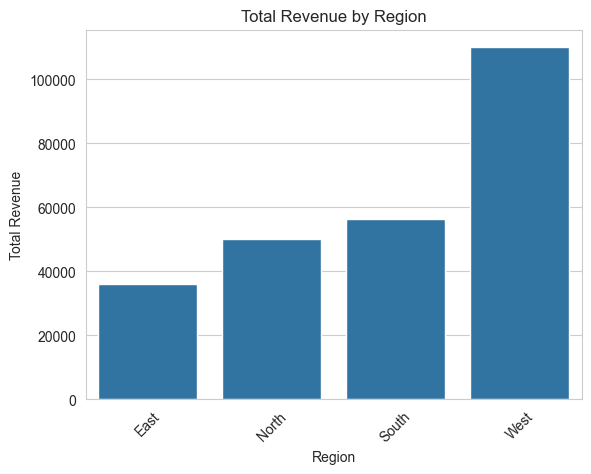

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x="Region", y="Total Revenue", data=region_sales)
plt.title("Total Revenue by Region")
plt.xticks(rotation=45)
plt.show()


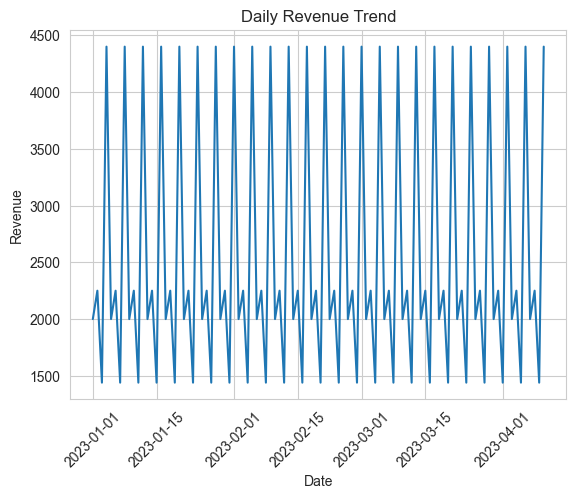

In [10]:
daily_revenue = df.groupby("Date")["Total Revenue"].sum().reset_index()
plt.plot(daily_revenue["Date"], daily_revenue["Total Revenue"])
plt.title("Daily Revenue Trend")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()
